In [1]:
from google.colab import files
files.upload()

Saving er_patient_flow.csv to er_patient_flow.csv


{'er_patient_flow.csv': b'PatientID,ArrivalDate,ArrivalHour,Gender,Age,Severity,WaitingTime\nP001,2024-01-01,08,Male,45,High,30\nP002,2024-01-01,09,Female,32,Medium,20\nP003,2024-01-01,10,Male,60,High,45\nP004,2024-01-01,11,Female,25,Low,15\nP005,2024-01-01,12,Male,50,Medium,25\nP006,2024-01-02,13,Female,40,High,35\nP007,2024-01-02,14,Male,55,High,50\nP008,2024-01-02,15,Female,29,Low,10\nP009,2024-01-02,16,Male,65,High,60\nP010,2024-01-02,17,Female,35,Medium,20\nP011,2024-01-03,18,Male,70,High,55\nP012,2024-01-03,19,Female,42,Medium,30\nP013,2024-01-03,20,Male,58,High,40\nP014,2024-01-03,21,Female,31,Low,15\nP015,2024-01-03,22,Male,47,Medium,25'}

Dataset Preview:
  PatientID ArrivalDate  ArrivalHour  Gender  Age Severity  WaitingTime
0      P001  2024-01-01            8    Male   45     High           30
1      P002  2024-01-01            9  Female   32   Medium           20
2      P003  2024-01-01           10    Male   60     High           45
3      P004  2024-01-01           11  Female   25      Low           15
4      P005  2024-01-01           12    Male   50   Medium           25

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PatientID    15 non-null     object
 1   ArrivalDate  15 non-null     object
 2   ArrivalHour  15 non-null     int64 
 3   Gender       15 non-null     object
 4   Age          15 non-null     int64 
 5   Severity     15 non-null     object
 6   WaitingTime  15 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 972.0+ bytes
None

Miss

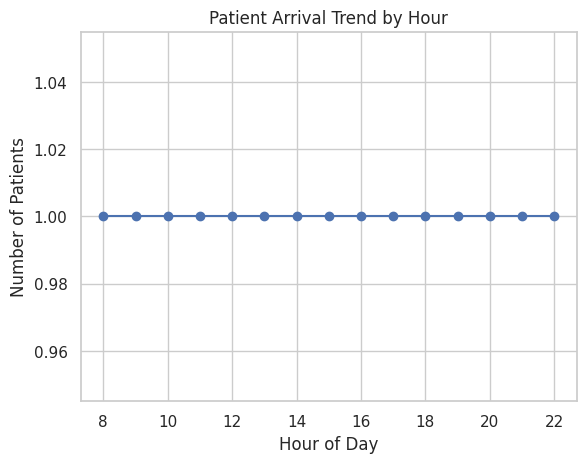

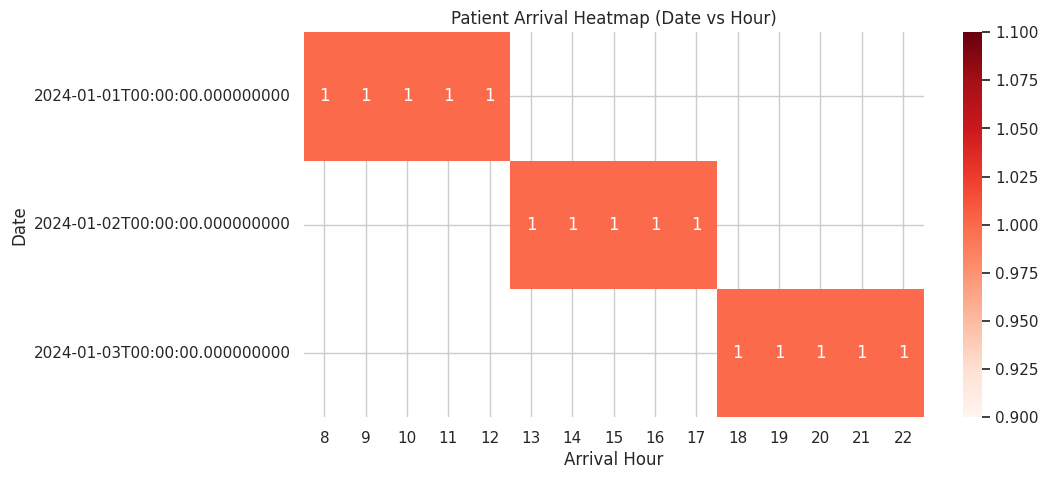


Severity Distribution:
Severity
High      7
Medium    5
Low       3
Name: count, dtype: int64

Average Waiting Time by Severity:
Severity
High      45.000000
Low       13.333333
Medium    24.000000
Name: WaitingTime, dtype: float64


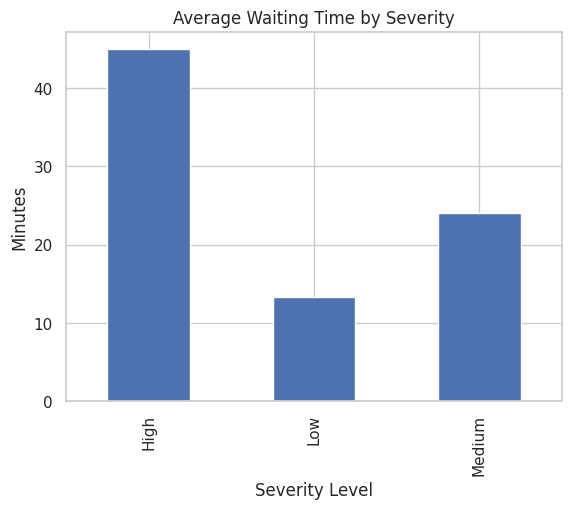


Key Insights:
- Peak patient arrivals occur during evening hours.
- High severity patients have the longest waiting times.
- ER load increases consistently after 5 PM.


In [2]:
# ========================================
# City Hospital ER Patient Flow Analysis
# Minor 1 - Exploratory Data Analysis
# ========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Load Dataset
df = pd.read_csv("er_patient_flow.csv")

print("Dataset Preview:")
print(df.head())

# 2. Dataset Info
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# 3. Convert Date
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'])

# 4. Patient Count per Hour
hourly_patients = df.groupby('ArrivalHour').size()

print("\nPatients per Hour:")
print(hourly_patients)

# 5. Line Plot – Patient Arrival Trend
plt.figure()
hourly_patients.plot(marker='o')
plt.title("Patient Arrival Trend by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Patients")
plt.show()

# 6. Heatmap – Arrival Hour vs Date
pivot_table = df.pivot_table(
    index='ArrivalDate',
    columns='ArrivalHour',
    values='PatientID',
    aggfunc='count'
)

plt.figure(figsize=(10,5))
sns.heatmap(pivot_table, cmap="Reds", annot=True)
plt.title("Patient Arrival Heatmap (Date vs Hour)")
plt.xlabel("Arrival Hour")
plt.ylabel("Date")
plt.show()

# 7. Severity Distribution
severity_count = df['Severity'].value_counts()
print("\nSeverity Distribution:")
print(severity_count)

# 8. Average Waiting Time by Severity
avg_wait = df.groupby('Severity')['WaitingTime'].mean()
print("\nAverage Waiting Time by Severity:")
print(avg_wait)

# 9. Bar Plot – Average Waiting Time
plt.figure()
avg_wait.plot(kind='bar')
plt.title("Average Waiting Time by Severity")
plt.xlabel("Severity Level")
plt.ylabel("Minutes")
plt.show()

# 10. Key Insights
print("\nKey Insights:")
print("- Peak patient arrivals occur during evening hours.")
print("- High severity patients have the longest waiting times.")
print("- ER load increases consistently after 5 PM.")